# Marketing campaign success estimation model

# Pre-processing steps

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text
from sklearn.model_selection import RandomizedSearchCV

In [82]:
data = pd.read_csv(r'marketing.csv')
data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,response,result
0,13829,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,-1,0,unknown,no
1,22677,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,-1,0,unknown,no
2,10541,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,-1,0,unknown,no
3,13689,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,-1,0,unknown,no
4,11304,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,14023,47,technician,married,secondary,no,1167,yes,no,cellular,30,apr,1,87,5,failure,yes
12866,17259,31,unknown,married,secondary,no,111,no,no,cellular,21,nov,2,93,2,failure,yes
12867,15200,37,unemployed,single,tertiary,no,1316,yes,no,cellular,18,nov,1,172,2,failure,no
12868,13775,42,management,married,tertiary,no,479,yes,no,unknown,28,may,2,-1,0,unknown,no


In [83]:
pd.set_option('display.max_columns', None)
data.describe(include='all')

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,response,result
count,12870.000000,12870.000000,12870,12870,12870,12870,12870.000000,12870,12870,12870,12870.000000,12870,12870.000000,12870.000000,12870.000000,12870,12870
unique,NaN,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,4,2
top,NaN,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,unknown,no
freq,NaN,NaN,2858,7490,6368,12662,NaN,6605,11060,8756,NaN,3594,NaN,NaN,NaN,10070,8903
mean,16434.500000,41.091142,NaN,NaN,NaN,NaN,1483.774437,NaN,NaN,NaN,15.641103,NaN,2.659130,45.555478,0.688967,NaN,NaN
std,3715.393317,11.305560,NaN,NaN,NaN,NaN,3311.055181,NaN,NaN,NaN,8.368983,NaN,2.863507,104.449411,2.049696,NaN,NaN
min,10000.000000,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN
25%,13217.250000,32.000000,NaN,NaN,NaN,NaN,102.000000,NaN,NaN,NaN,8.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN
50%,16434.500000,39.000000,NaN,NaN,NaN,NaN,515.000000,NaN,NaN,NaN,16.000000,NaN,2.000000,-1.000000,0.000000,NaN,NaN
75%,19651.750000,49.000000,NaN,NaN,NaN,NaN,1591.750000,NaN,NaN,NaN,21.000000,NaN,3.000000,-1.000000,0.000000,NaN,NaN


In [84]:
data.pdays.value_counts()

pdays
-1      10067
 182       76
 92        75
 91        65
 181       63
        ...  
 440        1
 804        1
 434        1
 437        1
 427        1
Name: count, Length: 461, dtype: int64

In [85]:
data.previous.value_counts()

previous
0     10067
1       921
2       692
3       391
4       248
5       182
6       109
7        60
8        54
9        28
10       28
12       20
11       18
13       11
14        6
17        6
16        4
15        4
20        4
19        2
21        2
23        2
29        2
30        2
18        2
26        1
37        1
22        1
58        1
55        1
Name: count, dtype: int64

In [86]:
data.drop(['ID', 'pdays', 'previous'], axis=1, inplace=True)

In [87]:
data['result'] = data['result'].map({'yes':0,'no':1})
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,response,result
0,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,unknown,1
1,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,unknown,1
2,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,unknown,1
3,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,unknown,1
4,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,47,technician,married,secondary,no,1167,yes,no,cellular,30,apr,1,failure,0
12866,31,unknown,married,secondary,no,111,no,no,cellular,21,nov,2,failure,0
12867,37,unemployed,single,tertiary,no,1316,yes,no,cellular,18,nov,1,failure,1
12868,42,management,married,tertiary,no,479,yes,no,unknown,28,may,2,unknown,1


In [88]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
response     0
result       0
dtype: int64

In [89]:
for i in data.columns:
    if data[i].dtypes==object:
        print(i)

job
marital
education
default
housing
loan
contact
month
response


In [90]:
# job - label
# marital - label
# education - map
# default - map
# housing - map
# loan - map
# contact - label
# month - label
# response - label

data['response'].value_counts()

response
unknown    10070
failure     1380
success      845
other        575
Name: count, dtype: int64

In [91]:
le = LabelEncoder()

label_cols = ['job', 'marital', 'contact', 'month', 'response']

for i in label_cols:
    data[i] = le.fit_transform(data[i])

data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,response,result
0,29,9,2,tertiary,no,18254,no,no,0,11,8,2,3,1
1,26,7,2,secondary,no,512,yes,yes,2,5,6,3,3,1
2,30,4,2,secondary,no,135,no,no,0,14,1,2,3,1
3,41,9,1,unknown,no,30,yes,no,0,10,5,1,3,1
4,27,0,2,secondary,no,321,no,yes,2,2,11,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,47,9,1,secondary,no,1167,yes,no,0,30,0,1,0,0
12866,31,11,1,secondary,no,111,no,no,0,21,9,2,0,0
12867,37,10,2,tertiary,no,1316,yes,no,0,18,9,1,0,1
12868,42,4,1,tertiary,no,479,yes,no,2,28,8,2,3,1


In [92]:
data['default'] = data['default'].map({'yes':1,'no':0})
data['housing'] = data['housing'].map({'yes':1,'no':0})
data['loan'] = data['loan'].map({'yes':1,'no':0})
data['education'] = data['education'].map({
    'unknown': 0,
    'primary': 1,
    'secondary': 2,
    'tertiary': 3
})

data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,response,result
0,29,9,2,3,0,18254,0,0,0,11,8,2,3,1
1,26,7,2,2,0,512,1,1,2,5,6,3,3,1
2,30,4,2,2,0,135,0,0,0,14,1,2,3,1
3,41,9,1,0,0,30,1,0,0,10,5,1,3,1
4,27,0,2,2,0,321,0,1,2,2,11,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12865,47,9,1,2,0,1167,1,0,0,30,0,1,0,0
12866,31,11,1,2,0,111,0,0,0,21,9,2,0,0
12867,37,10,2,3,0,1316,1,0,0,18,9,1,0,1
12868,42,4,1,3,0,479,1,0,2,28,8,2,3,1


In [93]:
X = data.drop('result', axis=1)
y = data['result']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [95]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score

def evaluate(model, X_train, y_train, X_test, y_test):
    
    '''Predictions and probabilities for the training set'''
    
    y_train_pred = model.predict(X_train)
    y_train_prob = model.predict_proba(X_train)[:, 1]

    '''Predictions and probabilities for the test set'''
    
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1]

    '''Calculate metrics for the training set''' 
    
    roc_train_prob = roc_auc_score(y_train, y_train_prob)
    gini_train_prob = roc_train_prob * 2 - 1
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)

    '''Calculate metrics for the test set'''
    
    roc_test_prob = roc_auc_score(y_test, y_test_prob)
    gini_test_prob = roc_test_prob * 2 - 1
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)

    results = pd.DataFrame({
        'Dataset': ['Train', 'Test'],
        'Gini': [gini_train_prob * 100, gini_test_prob * 100],
        'Precision': [precision_train, precision_test],
        'Recall': [recall_train, recall_test]
    })

    return results

# Modeling Steps

In [96]:
rfc = RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [97]:
one_tree = rfc.estimators_[30]

tree_rules_rf = export_text(one_tree, feature_names=list(X_train.columns))
print(tree_rules_rf)

|--- housing <= 0.50
|   |--- contact <= 1.50
|   |   |--- month <= 5.50
|   |   |   |--- marital <= 1.50
|   |   |   |   |--- campaign <= 3.50
|   |   |   |   |   |--- response <= 2.50
|   |   |   |   |   |   |--- age <= 34.50
|   |   |   |   |   |   |   |--- job <= 0.50
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- job >  0.50
|   |   |   |   |   |   |   |   |--- response <= 0.50
|   |   |   |   |   |   |   |   |   |--- month <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |--- month >  0.50
|   |   |   |   |   |   |   |   |   |   |--- campaign <= 2.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |   |--- campaign >  2.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- response >  0.50
|   |   |   |   |   |   |   |   |   |--- day <= 14.00
|   |   |   |   |   |   |   |   |   |   |--- balance <= 1433.5

In [98]:
result = evaluate(rfc, X_train, y_train, X_test, y_test)
result

,Dataset,Gini,Precision,Recall
0,Train,100.000000,1.00000,1.000000
1,Test,53.107882,0.80209,0.910641


In [99]:
def plot_feature_importances(model, feature_names):
    
    importances = model.feature_importances_
    
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by="Importance", ascending=False)
   
    
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.title("Feature Importances")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.gca().invert_yaxis() 
    plt.show()
    
    return importance_df

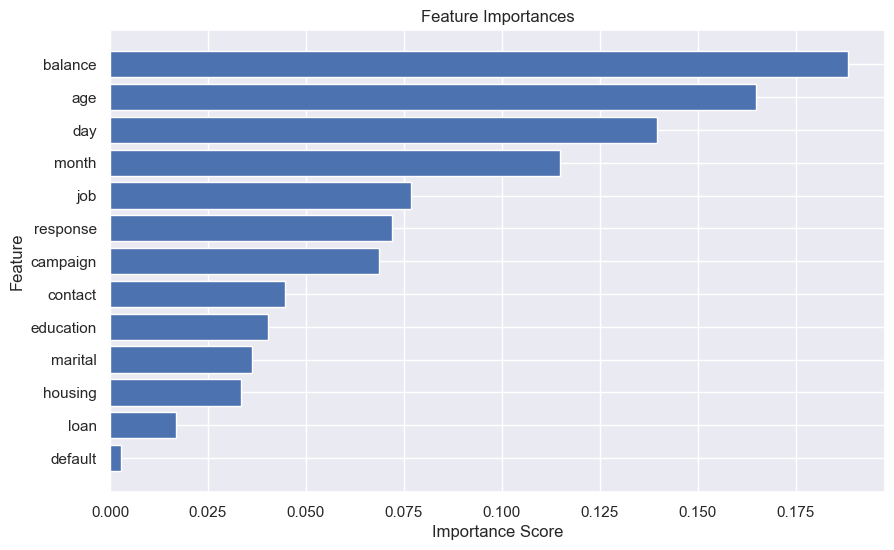

,Feature,Importance
5,balance,0.188360
0,age,0.164846
9,day,0.139689
10,month,0.114832
1,job,0.076866
12,response,0.072008
11,campaign,0.068745
8,contact,0.044761
3,education,0.040419
2,marital,0.036327


In [100]:
feature_names = X_train.columns

feature_importance_df = plot_feature_importances(rfc, feature_names)

feature_importance_df

In [101]:
X_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'response'],
      dtype='object')

In [102]:
clfRF_selected = RandomForestClassifier(random_state=42)

clfRF_selected.fit(X_train[['balance', 'age', 'day', 'month', 'job', 'response', 'campaign']],y_train)

RandomForestClassifier(random_state=42)

In [103]:
result = evaluate(clfRF_selected, X_train[['balance', 'age', 'day', 'month', 'job', 'response', 'campaign']],y_train,
                  X_test[['balance', 'age', 'day', 'month', 'job', 'response', 'campaign']], y_test)
result

,Dataset,Gini,Precision,Recall
0,Train,100.000000,1.000000,1.000000
1,Test,46.894698,0.788209,0.912125


In [104]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]

random_grid = {'n_estimators': n_estimators,
               'max_features': ['sqrt', 0.3, 0.5, None],
               'max_depth': max_depth,
               'min_samples_split': [20,50],
               'min_samples_leaf': [5, 8, 10]}
print(random_grid)

{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['sqrt', 0.3, 0.5, None], 'max_depth': [10, 19, 28, 37, 46, 55, 64, 73, 82, 91, 100], 'min_samples_split': [20, 50], 'min_samples_leaf': [5, 8, 10]}


In [105]:
rf_random = RandomizedSearchCV(
                    estimator=rfc, 
                    param_distributions=random_grid, 
                    n_iter=25,  
                    cv=3, 
                    verbose=1, 
                    random_state=42, 
                    n_jobs=-1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'max_depth': [10, 19, 28, 37, 46, 55,
                                                      64, 73, 82, 91, 100],
                                        'max_features': ['sqrt', 0.3, 0.5,
                                                         None],
                                        'min_samples_leaf': [5, 8, 10],
                                        'min_samples_split': [20, 50],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=42, verbose=1)

In [106]:
rf_random.best_params_

{'n_estimators': 644,
 'min_samples_split': 50,
 'min_samples_leaf': 5,
 'max_features': 0.5,
 'max_depth': 46}

In [107]:
optimized_model = rf_random.best_estimator_
evaluate(optimized_model, X_train, y_train, X_test, y_test)

,Dataset,Gini,Precision,Recall
0,Train,76.967234,0.809909,0.935063
1,Test,54.923888,0.798534,0.928810


In [41]:
one_tree = optimized_model.estimators_[21]

tree_rules_rf_opt = export_text(one_tree, feature_names=list(X_train.columns))
print(tree_rules_rf_opt)

|--- contact <= 1.50
|   |--- age <= 60.50
|   |   |--- month <= 9.50
|   |   |   |--- housing <= 0.50
|   |   |   |   |--- response <= 2.50
|   |   |   |   |   |--- campaign <= 3.50
|   |   |   |   |   |   |--- response <= 1.50
|   |   |   |   |   |   |   |--- age <= 24.50
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- age >  24.50
|   |   |   |   |   |   |   |   |--- month <= 7.50
|   |   |   |   |   |   |   |   |   |--- job <= 5.50
|   |   |   |   |   |   |   |   |   |   |--- balance <= 33.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |   |--- balance >  33.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- job >  5.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- month >  7.50
|   |   |   |   |   |   |   |   |   |--- job <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1

# Deployment

In [55]:
data1 = pd.read_excel(r'marketing_test.xlsx')
data1

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,response
0,812,25,blue-collar,single,secondary,no,764,yes,no,cellular,18,may,1,-1,0,unknown
1,71,40,blue-collar,single,primary,no,118,no,no,unknown,23,feb,1,-1,0,unknown
2,912,27,admin.,divorced,secondary,no,451,yes,no,cellular,16,jul,1,-1,0,unknown
3,43,30,services,single,secondary,no,495,yes,no,cellular,21,nov,1,-1,0,unknown
4,431,36,blue-collar,married,primary,no,1548,yes,yes,cellular,18,may,2,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,49,43,blue-collar,married,secondary,no,413,yes,no,cellular,12,aug,2,182,4,success
853,409,56,management,married,tertiary,no,1282,no,no,cellular,19,aug,4,-1,0,unknown
854,105,54,admin.,married,primary,no,976,yes,no,unknown,3,jun,3,-1,0,unknown
855,810,30,unemployed,single,tertiary,no,1159,no,no,telephone,5,jun,1,-1,0,unknown


In [56]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'response'],
      dtype='object')

In [57]:
data1 = data1[['ID','age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'response']]
data1

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,response
0,812,25,blue-collar,single,secondary,no,764,yes,no,cellular,18,may,1,unknown
1,71,40,blue-collar,single,primary,no,118,no,no,unknown,23,feb,1,unknown
2,912,27,admin.,divorced,secondary,no,451,yes,no,cellular,16,jul,1,unknown
3,43,30,services,single,secondary,no,495,yes,no,cellular,21,nov,1,unknown
4,431,36,blue-collar,married,primary,no,1548,yes,yes,cellular,18,may,2,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,49,43,blue-collar,married,secondary,no,413,yes,no,cellular,12,aug,2,success
853,409,56,management,married,tertiary,no,1282,no,no,cellular,19,aug,4,unknown
854,105,54,admin.,married,primary,no,976,yes,no,unknown,3,jun,3,unknown
855,810,30,unemployed,single,tertiary,no,1159,no,no,telephone,5,jun,1,unknown


In [58]:
le = LabelEncoder()

label_cols = ['job', 'marital', 'contact', 'month', 'response']

for i in label_cols:
    data1[i] = le.fit_transform(data1[i])

data1

/var/folders/3w/lwylg_mj7mj893_n6pzsr7680000gn/T/ipykernel_10144/1553477516.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[i] = le.fit_transform(data1[i])
/var/folders/3w/lwylg_mj7mj893_n6pzsr7680000gn/T/ipykernel_10144/1553477516.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[i] = le.fit_transform(data1[i])
/var/folders/3w/lwylg_mj7mj893_n6pzsr7680000gn/T/ipykernel_10144/1553477516.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,response
0,812,25,1,2,secondary,no,764,yes,no,0,18,8,1,3
1,71,40,1,2,primary,no,118,no,no,2,23,3,1,3
2,912,27,0,0,secondary,no,451,yes,no,0,16,5,1,3
3,43,30,7,2,secondary,no,495,yes,no,0,21,9,1,3
4,431,36,1,1,primary,no,1548,yes,yes,0,18,8,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,49,43,1,1,secondary,no,413,yes,no,0,12,1,2,2
853,409,56,4,1,tertiary,no,1282,no,no,0,19,1,4,3
854,105,54,0,1,primary,no,976,yes,no,2,3,6,3,3
855,810,30,10,2,tertiary,no,1159,no,no,1,5,6,1,3


In [59]:
data1['default'] = data1['default'].map({'yes':1,'no':0})
data1['housing'] = data1['housing'].map({'yes':1,'no':0})
data1['loan'] = data1['loan'].map({'yes':1,'no':0})
data1['education'] = data1['education'].map({
    'unknown': 0,
    'primary': 1,
    'secondary': 2,
    'tertiary': 3
})

data1

/var/folders/3w/lwylg_mj7mj893_n6pzsr7680000gn/T/ipykernel_10144/3567399612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['default'] = data1['default'].map({'yes':1,'no':0})
/var/folders/3w/lwylg_mj7mj893_n6pzsr7680000gn/T/ipykernel_10144/3567399612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['housing'] = data1['housing'].map({'yes':1,'no':0})
/var/folders/3w/lwylg_mj7mj893_n6pzsr7680000gn/T/ipykernel_10144/3567399612.py:3: SettingWithCopyWarning: 
A value is trying to be set on a 

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,response
0,812,25,1,2,2,0,764,1,0,0,18,8,1,3
1,71,40,1,2,1,0,118,0,0,2,23,3,1,3
2,912,27,0,0,2,0,451,1,0,0,16,5,1,3
3,43,30,7,2,2,0,495,1,0,0,21,9,1,3
4,431,36,1,1,1,0,1548,1,1,0,18,8,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,49,43,1,1,2,0,413,1,0,0,12,1,2,2
853,409,56,4,1,3,0,1282,0,0,0,19,1,4,3
854,105,54,0,1,1,0,976,1,0,2,3,6,3,3
855,810,30,10,2,3,0,1159,0,0,1,5,6,1,3


In [61]:
data1['probability'] = optimized_model.predict_proba(data1.iloc[:,1:])[:,1]

data1

/var/folders/3w/lwylg_mj7mj893_n6pzsr7680000gn/T/ipykernel_10144/1318861831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['probability'] = optimized_model.predict_proba(data1.iloc[:,1:])[:,1]


,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,response,probability
0,812,25,1,2,2,0,764,1,0,0,18,8,1,3,0.551425
1,71,40,1,2,1,0,118,0,0,2,23,3,1,3,0.823154
2,912,27,0,0,2,0,451,1,0,0,16,5,1,3,0.555690
3,43,30,7,2,2,0,495,1,0,0,21,9,1,3,0.625042
4,431,36,1,1,1,0,1548,1,1,0,18,8,2,3,0.806902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,49,43,1,1,2,0,413,1,0,0,12,1,2,2,0.233017
853,409,56,4,1,3,0,1282,0,0,0,19,1,4,3,0.724990
854,105,54,0,1,1,0,976,1,0,2,3,6,3,3,0.935985
855,810,30,10,2,3,0,1159,0,0,1,5,6,1,3,0.384575
